In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sb
import time

# Data exploration

In [70]:
cardio = pd.read_csv('cardio_train_data.csv')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [71]:
# update age in days to years
cardio.age = cardio.age / 365
cardio.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [72]:
# ap_hi and ap_lo max is 16020 and 11000
cardio[cardio.columns].max()

id             99999.000000
age               64.967123
gender             2.000000
height           250.000000
weight           200.000000
ap_hi          16020.000000
ap_lo          11000.000000
cholesterol        3.000000
gluc               3.000000
smoke              1.000000
alco               1.000000
active             1.000000
cardio             1.000000
dtype: float64

In [73]:
# ap_hi and ap_lo min is -150, -70
cardio[cardio.columns].min()

id               0.000000
age             29.583562
gender           1.000000
height          55.000000
weight          10.000000
ap_hi         -150.000000
ap_lo          -70.000000
cholesterol      1.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           0.000000
cardio           0.000000
dtype: float64

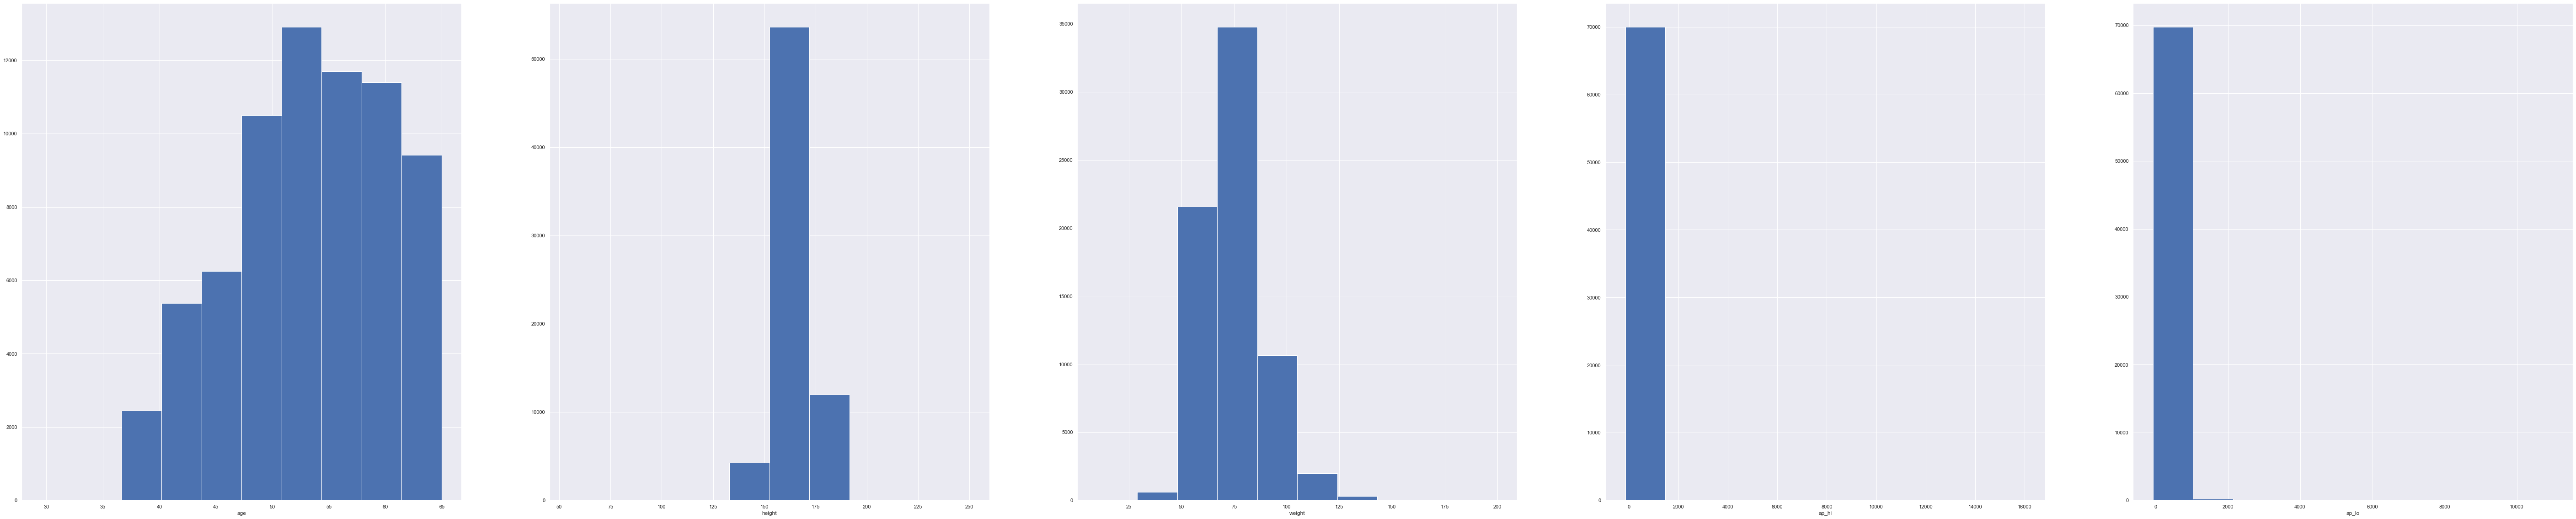

In [74]:
cols = ['age','height','weight','ap_hi','ap_lo']

sb.set_style('darkgrid')
fig, ax = plt.subplots(ncols = 5, figsize=(100,20))

for i in range(len(cols)):
    ax[i].hist(cardio[cols[i]], bins=10)
    ax[i].set(xlabel=cols[i])

In [75]:
# set limits for ap_hi and ap_lo
max_ap_hi = 200
max_ap_lo = 150
min_ap_hi = 50
min_ap_lo = 30

df = cardio[(cardio.ap_hi < max_ap_hi) & (cardio.ap_hi > min_ap_hi)
       & (cardio.ap_lo < max_ap_lo) & (cardio.ap_lo > min_ap_lo)]

print(len(df))
print(df[df.columns].max())
print(df[df.columns].min())

68603
id             99999.000000
age               64.967123
gender             2.000000
height           250.000000
weight           200.000000
ap_hi            197.000000
ap_lo            140.000000
cholesterol        3.000000
gluc               3.000000
smoke              1.000000
alco               1.000000
active             1.000000
cardio             1.000000
dtype: float64
id              0.000000
age            29.583562
gender          1.000000
height         55.000000
weight         11.000000
ap_hi          60.000000
ap_lo          40.000000
cholesterol     1.000000
gluc            1.000000
smoke           0.000000
alco            0.000000
active          0.000000
cardio          0.000000
dtype: float64


[Text(0.5, 0, 'Diastolic BP')]

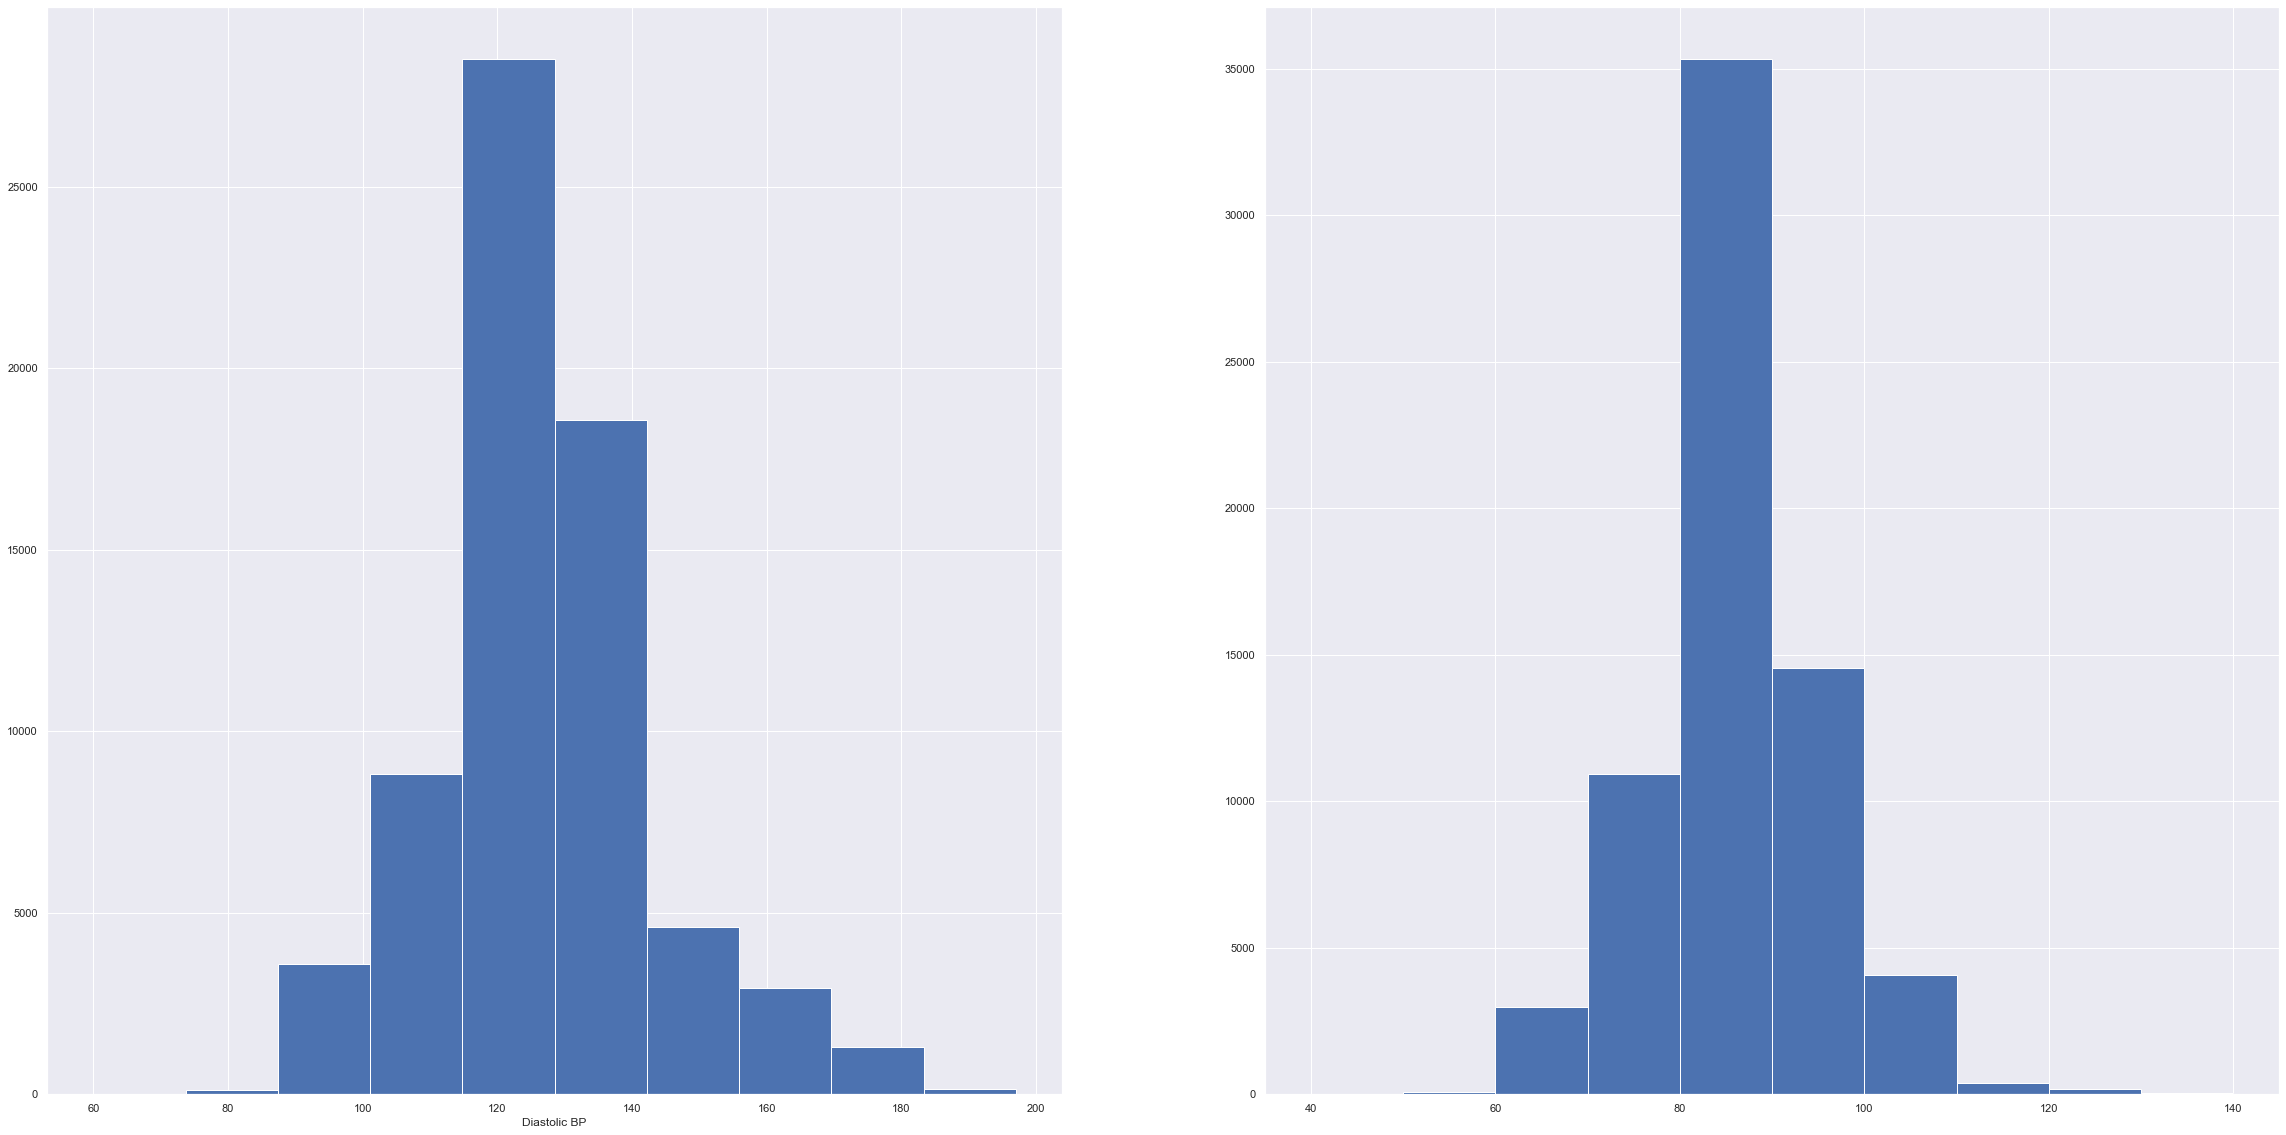

In [76]:
sb.set_style('darkgrid')
fig, ax = plt.subplots(ncols = 2, figsize=(40,20))

ax[0].hist(df['ap_hi'], bins=10)
ax[0].set(xlabel='Systolic BP')
ax[1].hist(df['ap_lo'], bins=10)
ax[0].set(xlabel='Diastolic BP')


# Using all features

In [77]:
x = df.iloc[:,1:-1]
y = df['cardio']

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [79]:
x_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
58793,53.947945,2,170,80.0,130,90,3,1,0,0,1
6376,61.632877,1,164,85.0,170,90,2,2,0,0,0
23789,47.531507,1,158,63.0,100,70,1,1,0,0,1
32029,41.734247,1,164,68.0,120,80,2,1,0,0,1
32956,57.791781,1,165,69.0,120,80,2,1,0,0,0


# KNN

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [81]:
y_pred = knn.predict(x_test)


In [82]:
from sklearn.metrics import accuracy_score


In [83]:
print(accuracy_score(y_test,y_pred))

0.6864905836394379


In [88]:
arr = np.arange(1,51,5)
data = {'Neighbours' : arr,
        'Accuracy Score': [0] * len(arr),
        'Training Time': [0] * len(arr),
        'Prediction Time': [0] * len(arr)}
df = pd.DataFrame(data, index=arr)

for k in arr:
    knn = KNeighborsClassifier(n_neighbors = k)
    start_train= time.time()
    knn.fit(x_train, y_train)
    train_time =  round(time.time() - start_train,4)
    print("Duration of Training for {0} neighbours: {1}s seconds".format(k, train_time))

    df.loc[k, 'Training Time'] = train_time

    start_test = time.time()
    preds = knn.predict(x_test)
    pred_time = round(time.time() - start_test,4)
    print("Duration of Predicting for {0} neighbours: {1}s seconds".format(k, pred_time))

    df.loc[k,'Prediction Time'] = pred_time

    ac = accuracy_score(y_test, preds)
    df.loc[k, 'Accuracy Score'] = ac

Duration of Training for 1 neighbours: 0.0385s seconds
Duration of Predicting for 1 neighbours: 0.3381s seconds
Duration of Training for 6 neighbours: 0.0198s seconds
Duration of Predicting for 6 neighbours: 0.4329s seconds
Duration of Training for 11 neighbours: 0.0164s seconds
Duration of Predicting for 11 neighbours: 0.5299s seconds
Duration of Training for 16 neighbours: 0.0161s seconds
Duration of Predicting for 16 neighbours: 0.5857s seconds
Duration of Training for 21 neighbours: 0.0161s seconds
Duration of Predicting for 21 neighbours: 0.626s seconds
Duration of Training for 26 neighbours: 0.0161s seconds
Duration of Predicting for 26 neighbours: 0.6504s seconds
Duration of Training for 31 neighbours: 0.0166s seconds
Duration of Predicting for 31 neighbours: 0.6672s seconds
Duration of Training for 36 neighbours: 0.0186s seconds
Duration of Predicting for 36 neighbours: 0.7344s seconds
Duration of Training for 41 neighbours: 0.0169s seconds
Duration of Predicting for 41 neighbo

In [89]:
df.head()

,Neighbours,Accuracy Score,Training Time,Prediction Time
1,1,0.631159,0.0385,0.3381
6,6,0.693312,0.0198,0.4329
11,11,0.708297,0.0164,0.5299
16,16,0.713953,0.0161,0.5857
21,21,0.713603,0.0161,0.6260


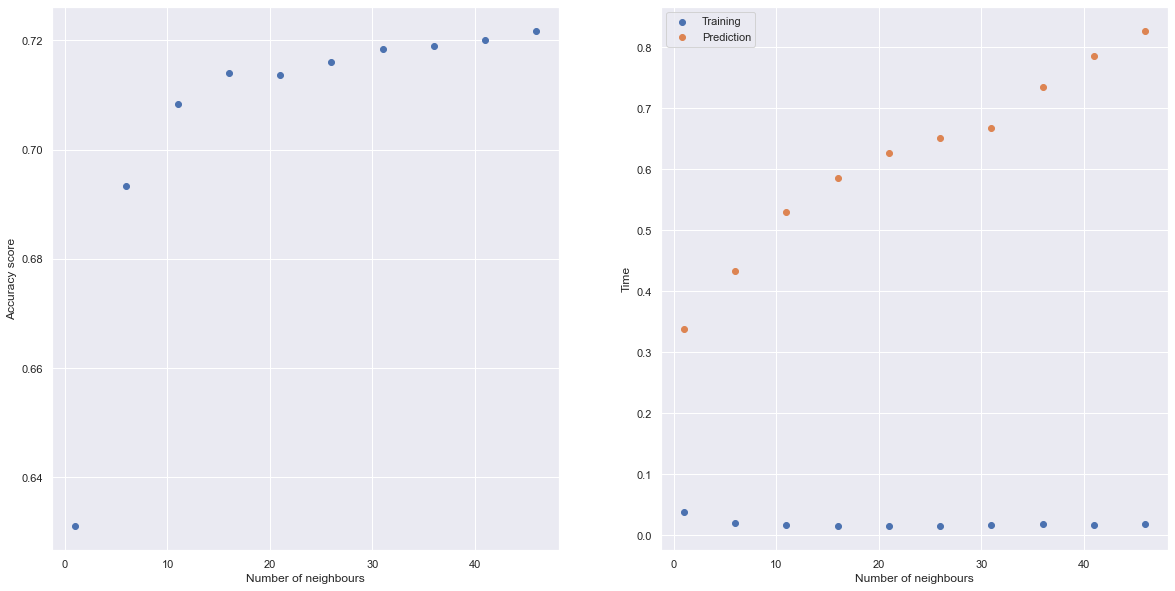

In [90]:
sb.set(style='darkgrid')
fig,ax = plt.subplots(ncols=2, figsize=(20,10))
ax[0].scatter(df.index, df['Accuracy Score'], label='accuracy_score')
ax[0].set(xlabel='Number of neighbours', ylabel='Accuracy score')

ax[1].scatter(df.index, df['Training Time'], label='Training')
ax[1].scatter(df.index, df['Prediction Time'], label='Prediction')
ax[1].set(xlabel='Number of neighbours', ylabel='Time')
ax[1].legend()

In [91]:
print('Using all features,')
print('Highest accuracy score: ', max(df['Accuracy Score']))
print('This is achieved with {0} neighbours (k = {0}) '.format(df['Accuracy Score'].idxmax()))

Using all features,
Highest accuracy score:  0.7216488834470294
This is achieved with 46 neighbours (k = 46) 


In [92]:
knn_46 = KNeighborsClassifier(n_neighbors=31)
knn_46.fit(x_train, y_train)
y_pred = knn_46.predict(x_test)

In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6691, 2032],
       [2796, 5632]])

# Findings for KNN
1. If all features are used, accuracy score is highest with 46 neighbours
2. With 46 neighbours, there is a risk of overfitting - outlier heights like 55, 250cm, and weights like 11, 100kg were not excluded

# Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from graphviz import Source

In [95]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [96]:
y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test,y_pred)

0.6298175033525742


array([[5433, 3290],
       [3059, 5369]])

In [102]:
Source(tree.export_graphviz(dt, out_file='tree.dot', class_names=['Yes', 'No'], feature_names= x_train.columns))

AttributeError: 'NoneType' object has no attribute 'splitlines'